In [58]:
#prepare dataframe of quantitative inputs to generate train_test split

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
df=pd.read_csv('quants_narrow_outlier_false.csv')
df = df.iloc[:,1:]
df.columns

Index(['duration', 'budget', 'gross', 'year', 'month', 'roi_outlier_ind'], dtype='object')

In [25]:
columns_to_keep=['duration','budget','gross','month']

In [26]:
df1 = df[columns_to_keep]

In [27]:
df1.head()

,duration,budget,gross,month
0,78,2500,15610,3
1,100,2500,51,10
2,80,5000,18389,4
3,75,5000,16743,8
4,79,7000,74,10


In [28]:
genre = pd.read_csv('genre_ary.csv')
genre = genre.iloc[:,1:]
genre
lang = pd.read_csv('language_ary.csv')
lang = lang.iloc[:,1:]

In [29]:
df_X = df1.join(genre).join(lang) #merges based on index location, which is desired

In [30]:
df_X=pd.read_csv('quants_narrow_outlier_false.csv')
df_X=df_X.drop(['Unnamed: 0','year'],axis=1)


In [31]:
df_X = df_X.join(genre)

In [32]:
df_X=df_X.join(lang)

In [33]:
df_X.to_csv('wide_quants1.csv')

In [35]:
df_X.head()


,duration,budget,gross,month,roi_outlier_ind,action,adventure,animation,biography,comedy,...,chinese,english,french,german,italian,japanese,korean,other,russian,spanish
0,78,2500,15610,3,False,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,100,2500,51,10,False,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,80,5000,18389,4,False,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,75,5000,16743,8,False,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,79,7000,74,10,False,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
y=df_X["gross"]

In [37]:
df_X = df_X.drop(['gross','roi_outlier_ind'], axis=1)

In [38]:
df_X.columns

Index(['duration', 'budget', 'month', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'musical', 'mystery', 'romance', 'scifi', 'sport',
       'thriller', 'war', 'western', 'arabic', 'chinese', 'english', 'french',
       'german', 'italian', 'japanese', 'korean', 'other', 'russian',
       'spanish'],
      dtype='object')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, random_state=42)

In [47]:
model = LinearRegression()

In [49]:
# Fit the model to the training data and calculate the scores for the training and testing data


model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6980059643670785
Testing Score: 0.715561792034419


In [50]:
y_pred=model.predict(X_test)

In [51]:
model.score(df_X, y)

0.7023615316645448

Text(0.5, 1.0, 'Residual Plot')

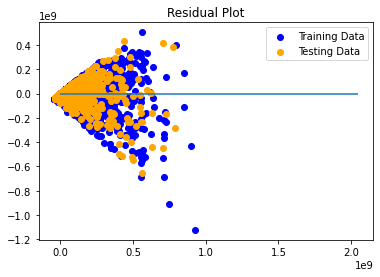

In [54]:
# Plot the Residuals for the Training and Testing data


plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")